In [ ]:
#########################################################################
# Convolutional Network 
#########################################################################
# Performed by Ximena Rios -Universidad del Valle
#########################################################################

In [30]:
#Parametros generales
IMG_ALTO = 150
IMG_ANCHO =150
LOTE_SIZE = 32 #tamaño de los lotes de datos

#Definir los directorios de trabajo 
import os
train_dir = os.getcwd() + '/base_datos/train/'
validacion_dir= os.getcwd() + '/base_datos/validacion/'
test_dir = os.getcwd() + '/base_datos/test/'

#Definir el nombre para guardar el modelo y los datos 
nombre=('Conv')

In [32]:
from keras import layers
from keras import models
import numpy as np

#Arquitectura de la red (small convnet)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_ALTO, IMG_ANCHO, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=stable

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [34]:
#adicionar dropout
model.add(layers.Dropout(0.5))
#Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(15, activation='softmax')) #capa densa de tamaño 15. para cada entrada la red saca un vector de 15 dimensiones. cada entrada en este vector codifica una clase diferente de salida 
# activacion softmax significa que la red puede sacar una distribucion de probabilidad sobre 15 diferentes clases de salida

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [36]:
#compilar
from keras import optimizers
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy', #funcion de activacion para clasificacion multiclase
    metrics=['acc'])  #categorical_crossentropy, espera que las etiquetas sigan una codificación categórica
    #categorical--> will be 2D one-hot encoded labels

In [37]:
#Crear una instancia de la clase ImageDataGenerator para el aumento de datos
from keras.preprocessing.image import ImageDataGenerator
train_dir = os.getcwd() + '/base_datos/train/'
validacion_dir= os.getcwd() + '/base_datos/validacion/'
train_datagen = ImageDataGenerator(
            rescale=1./255, # Todas las imágenes serán reescaladas por 1./255
            width_shift_range=0.2, #son rangos(una fraccion del total) dentro de los cuales se puede trasladar una figura aleatoreamente
            height_shift_range=0.2, 
            zoom_range=0.2, 
            horizontal_flip=True, #Voltear aleatoriamente las entradas horizontalmente
            vertical_flip=True, 
            fill_mode='nearest') #nearest #reflect constant
#Note que los datos de validacion no deben ser aumentados!!!
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
#Generar datos por el metodo flow_from_directory de la clase ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,# Este es el directorio objetivo
    target_size=(IMG_ALTO, IMG_ANCHO), # Tamaño de las imágenes (serán redimensionadas)
    batch_size=LOTE_SIZE, #tamaño de los lotes de datos (cantidad de imagenes generadas)
    #save_to_dir=os.getcwd() + '/base_datos/AumenTrain/',
    class_mode='categorical') # Como usamos la funcion de pérdida categorical_crossentropy, necesitamos etiquetas categorical
    #categorical --> will be 2D one-hot encoded labels
    #produce lotes de imágenes RGB de 150x150 (forma (32, 150, 150, 3)) y etiquetas 2D one-hot  (forma (32,))
#Datos de validacion
validation_generator = test_datagen.flow_from_directory(
    validacion_dir,
    target_size=(IMG_ALTO, IMG_ANCHO),
    batch_size=LOTE_SIZE,
    class_mode='categorical')

Found 4664 images belonging to 15 classes.
Found 591 images belonging to 15 classes.


In [41]:
#Entrenar la red
STEPS_PER_EPOCH = 120
history = model.fit_generator(
    train_generator, #un generador Python que genere lotes de entradas y targets indefinidamente
    steps_per_epoch=STEPS_PER_EPOCH, #100 #2000 #cuántas muestras extraer del generador antes de declarar una época finalizada
    epochs= 30, #100,  #30, #50
    validation_data=validation_generator,
    validation_steps=30 ) #800

Epoch 1/30
146/146 [==============================] - 59s 407ms/step - loss: 2.5316 - acc: 0.1958 - val_loss: 2.7425 - val_acc: 0.2365
Epoch 2/30
146/146 [==============================] - 55s 373ms/step - loss: 2.3057 - acc: 0.2568 - val_loss: 2.0810 - val_acc: 0.3110
Epoch 3/30
146/146 [==============================] - 55s 379ms/step - loss: 2.1763 - acc: 0.3008 - val_loss: 1.9739 - val_acc: 0.3775
Epoch 4/30
146/146 [==============================] - 56s 384ms/step - loss: 2.0522 - acc: 0.3433 - val_loss: 1.7969 - val_acc: 0.4136
Epoch 5/30
146/146 [==============================] - 54s 371ms/step - loss: 1.9605 - acc: 0.3697 - val_loss: 1.9850 - val_acc: 0.3330
Epoch 6/30
146/146 [==============================] - 57s 388ms/step - loss: 1.8931 - acc: 0.4043 - val_loss: 1.9270 - val_acc: 0.3790
Epoch 7/30
146/146 [==============================] - 55s 378ms/step - loss: 1.7913 - acc: 0.4229 - val_loss: 1.6684 - val_acc: 0.4978
Epoch 8/30
146/146 [==============================] - 5

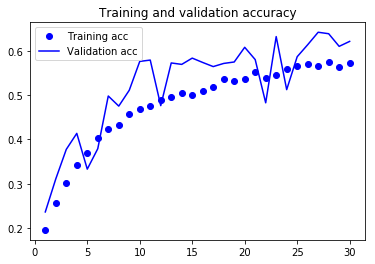

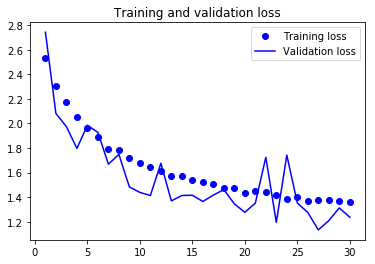

In [43]:
#graficar
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') #Entrenamiento acc
plt.plot(epochs, val_acc, 'b', label='Validation acc') #Validación acc
#plt.xlabel('Epochs'); plt.ylabel('acc')
plt.title('Training and validation accuracy ('+nombre+')') # Entrenamiento y validación (precisión acc)
plt.legend()
plt.savefig(nombre+'.png') #guardar figura #plt.savefig('VGG16.png')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss ('+nombre+')') #Entrenamiento y validación (función de perdida)
plt.legend()
plt.savefig(nombre+'L.png') #guardar figura #plt.savefig('VGG16L.png')
plt.show()

In [44]:
#########################################################################
# Evaluar el modelo cargado con los datos de test
#########################################################################
#Generar datos por el metodo flow_from_directory de la clase ImageDataGenerator
#Datos de test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')
#Evaluar el modelo con los datos de test
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc,'  test loss:', test_loss )

Found 585 images belonging to 15 classes.
test acc: 0.6020304627224878   test loss: 1.3798849277084855
